<img src= "https://maua.br/images/logo-IMT.png" width=250>

#  <center> <font color=#023e8a>  ECM797: Introdução à Computação Quântica  <center>
 <center> Prof. Sandro Martini <center>

## <center>  Semana 07: Qiskit - Instalação e Testes

## Nome: Rafael Rubio
### RA: 20.00611-0

## Créditos e reconhecimento

Este material didático foi desenvolvido com base nos recursos fornecidos pelo [Qiskit](https://www.ibm.com/quantum/qiskit) , uma iniciativa da IBM para promover e facilitar a educação e a pesquisa em computação quântica. **O Qiskit é um framework de código aberto dedicado à computação quântica, e visa fornecer ferramentas acessíveis para profissionais, pesquisadores e estudantes interessados nesta área inovadora de estudo.**

Ao longo deste curso, utilizaremos exemplos, exercícios e metodologias adaptadas dos materiais disponíveis publicamente no Qiskit, traduzidos e modificados para melhor atender às necessidades do curso. Esta iniciativa não seria possível sem os valiosos recursos disponibilizados pela equipe do Qiskit e pela IBM.

Encorajamos todos os alunos a explorarem o [site oficial do Qiskit](https://www.ibm.com/quantum/qiskit) e a se engajarem com a vasta gama de materiais educacionais, tutoriais e documentações oferecidos, para aprofundar seus conhecimentos e habilidades em computação quântica.

## Instruções iniciais:

1. <span style="color: red;">**Leia TODO o notebook e realize as tarefas indicadas**</span>;
2. Quando tiver terminado, envie esse próprio arquivo com as atividades realizadas.
3. O laboratório é um momento de independência para que você possa aprender de forma autônoma. Por isso leia atentamente as instruções, discuta com os colegas os exercícios, os códigos e as soluções. 
   



## Objetivos:

-  Instalar o Qiskit.
-  Testar e realizar algumas simulações.

## Instalando o Qiskit

Instale o SDK do Qiskit e o cliente do Qiskit Runtime.

In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-ibm-runtime

Para usar as funcionalidades de visualização é recomendado instalar um suporte adicional para visualização.

In [ ]:
pip install qiskit[visualization]

In [ ]:
pip install --upgrade pydantic

<span style="color: red;">**Depois dos pacotes instalados, vá em `Kernel` e clique em `Restart & Clean Output`**</span>

## Exemplos do Qiskit

### Vetores e Matrizes

O Qiskit utiliza a linguagem de programação Python. Em Python, as operações com matrizes e vetores podem ser realizadas usando a classe de `array` da biblioteca `NumPy`.

Aqui está um exemplo de uma célula de código que define dois vetores, `ket0` e `ket1`, correspondentes aos vetores de estado do qubit ∣0⟩ e ∣1⟩, e exibe sua média.

In [1]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

É importante destacar que executar células de código sequencialmente em um notebook tem um efeito cumulativo, ou seja, não é necessário recarregar a classe `array` ou definir `ket0` e `ket1` novamente. Recarregar a página ou mudar para outra página, no entanto, resetará tudo para o estado inicial.

Como uma orientação geral, espera-se que as células de código dentro de cada subseção do notebook sejam executadas sequencialmente. Portanto, se a execução de uma célula de código gerar um erro, certifique-se de primeiro executar todas as células de código anteriores dentro da subseção em que essa célula de código aparece.

Também podemos usar `array` para criar matrizes que representam operações.

In [2]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

A multiplicação de matrizes pode ser realizada usando a função `matmul` do NumPy:

In [3]:
from numpy import matmul

display(matmul(M1, M2))
display(matmul(M2, M1))

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

Na multiplicação de uma matriz por um vetor no contexto da álgebra linear,  e consequentemente na operação `matmul` do NumPy, o vetor é tratado como uma matriz coluna. Mesmo que o vetor seja fornecido como um array unidimensional (por exemplo, `ket0 = array([1, 0])`, na operação de multiplicação de matrizes, ele é conceitualmente considerado como uma matriz coluna (neste caso, 2×1).

In [4]:
display(matmul(M1, ket1))

array([1, 0])

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 1: </strong>  

Considere as matrizes *A* e *B* abaixo. Calcule o produto *AB*.

$$
A = \begin{pmatrix} 2 & 4 \\ 3 & 1 \end{pmatrix}
$$

$$
B = \begin{pmatrix} 1 & 3 \\ 2 & 0 \end{pmatrix}
$$


</div>

In [5]:
#coloque seu código aqui
matriz_a = array([[2, 4], [3, 1]])
matriz_b = array([[1, 3], [2, 0]])

display(matmul(matriz_a, matriz_b))

array([[10,  6],
       [ 5,  9]])

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 2: </strong>  

Considere as matrizes *C* e *D* abaixo. Calcule o produto *CD*.

$$
C = \begin{pmatrix} -1 & 2 & 0 \\ 3 & 0 & 1 \end{pmatrix}
$$

$$
D = \begin{pmatrix} 3 & 1 \\ 2 & -2 \\ 0 & 4 \end{pmatrix}
$$

In [6]:
#coloque seu código aqui
matriz_c = array([[-1, 2, 0], [3, 0, 1]])
matriz_d = array([[3, 1], [2, -2], [0, 4]])

display(matmul(matriz_c, matriz_d))

array([[ 1, -5],
       [ 9,  7]])

### Estados, medições e operações


O Qiskit inclui várias classes que permitem que estados, medições e operações sejam facilmente criados e manipulados. Alguns exemplos para começar são incluídos abaixo.

#### Definindo e exibindo vetores de estado

A classe `Statevector` do Qiskit oferece funcionalidades para definir e manipular vetores de estado quântico. A seguinte célula de código importa a classe Statevector e define alguns vetores usando-a. (Observe que precisamos da função sqrt da biblioteca NumPy para calcular as raízes quadradas para o vetor u.)


In [7]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


A classe `Statevector` oferece um comando `draw` para exibir vetores de estado, incluindo opções de latex e texto para diferentes visualizações, como demonstra a célula de código a seguir:

In [8]:
display(u.draw("latex"))
display(u.draw("text"))
display(v.draw("latex"))
display(v.draw("text"))
display(w.draw("latex"))
display(w.draw("text"))

<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

[0.33333333+0.j,0.66666667+0.j]

A classe `Statevector` também inclui o método `is_valid`, que verifica se um dado vetor é um vetor de estado quântico válido (ou seja, se tem uma norma euclidiana igual a 1):

In [9]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 3: </strong>  

Dado o seguinte estado quântico:

$$
 | \phi \rangle \ = \frac{1}{\sqrt{3}} | 0 \rangle \ + \sqrt{2}i| 1 \rangle
$$

A apresente o vetor no formato latex e verifique se ele está normalizado ou não.

In [24]:
#coloque seu código aqui
vet_a = Statevector([1 / sqrt(3), sqrt(2.0j)])

display(vet_a.draw("latex"))
display(vet_a.is_valid())

<IPython.core.display.Latex object>

False

#### Simulando medições usando `Statevector`

Em seguida, veremos uma maneira pela qual as medições de estados quânticos podem ser simuladas no Qiskit, usando o método `measure` da classe `Statevector`.

Primeiro, criamos um vetor de estado de qubit v e, em seguida, o exibimos.

In [14]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

Em seguida, executar o método `measure` simula uma medição na base padrão. Ele retorna o resultado dessa medição, além do novo estado quântico do nosso sistema após essa medição. A medição efetivamente "colapsa" o estado para um dos estados da base (neste caso, os estados da base computacional |0⟩ e |1⟩).

In [20]:
v.measure()

(np.str_('1'),
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Os resultados das medições são **probabilísticos**, portanto, o mesmo método pode retornar resultados diferentes. <span style="color: red;">Tente executar a célula algumas vezes para ver isso</span>. Para o exemplo particular do vetor v definido acima, o método `measure` define o vetor de estado quântico após a medição ocorrer como sendo

$$\left( \frac{1 + 2i}{\sqrt{5}} \right) |0\rangle$$


 ou

$$-|1\rangle$$

dependendo do resultado da medição. Em ambos os casos, as alternativas são, de fato, equivalentes — elas são ditas diferir por uma fase global porque uma é igual à outra multiplicada por um número complexo na circunferência unitária. Como uma observação à parte, o `Statevector` lançará um erro se o método `measure` for aplicado a um vetor de estado quântico inválido.

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 4:</strong> 
Usando o vetor da Atividade 3, efetue a medida e explique o que acontece.   

In [25]:
##coloque aqui seu código
vet_a.measure()

ValueError: Probabilities do not sum to 1. See Notes section of docstring for more information.

**Insira sua explicação aqui**

A medição não foi possível pois o vetor não possui um estado quântico válido.

O `Statevector` também vem com um método `sample_counts` que permite a simulação de qualquer número de medições no sistema. Por exemplo, a seguinte célula mostra o resultado de medir o vetor v 1000 vezes, o que (com alta probabilidade) resulta no resultado  0 aproximadamente 5 de cada 9 vezes (ou cerca de 556 dos 1000 testes) e o resultado 1 aproximadamente 4 de cada 9 vezes (ou cerca de 444 dos 1000 testes). A célula também demonstra a função `plot_histogram` para visualizar os resultados.

{np.str_('0'): np.int64(11224), np.str_('1'): np.int64(8776)}

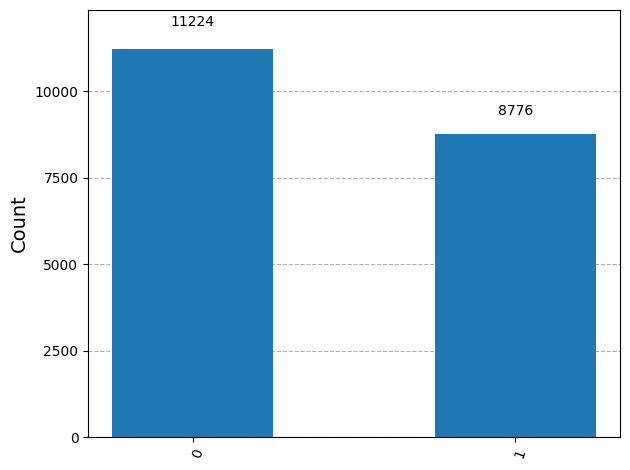

In [109]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(20000)
display(statistics)
plot_histogram(statistics)

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 5:</strong> Execute a célula várias utilizando diferentes números de amostras no lugar de 1000. Isso pode ser útil para desenvolver alguma intuição sobre como o número de tentativas influencia as probabilidades estimadas. Relate o que você observou.

**Insira sua explicação aqui**

Independente do número de tentaivas a proporcção entre os resultados 0 e 1 se manteve a mesma, ou seja, 5/9 e 4/9 respectivamente. Isso mostra que o número de tentativas não influencia as probabilidades estimadas, mas sim a quantidade de vezes que cada resultado é obtido.


#### Realizando operações com `Operator` e `Statevector`

Operações unitárias (operadores unitários) podem ser definidas e realizadas em vetores de estado no Qiskit usando a classe `Operator`, como no exemplo a seguir:

$$X|0\rangle = |\phi\rangle = |1\rangle$$

In [110]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
ket0 = Statevector([1, 0])
q = ket0.evolve(X)


q.draw("text")

[0.+0.j,1.+0.j]

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 6:</strong> Porta de Hadamard H representada pelo operador linear: 
    
$$H=\frac{1}{\sqrt2}\left(\begin{matrix}1&1\\1&-1\\\end{matrix}\right)$$
    
Determine:
    
$$H|1\rangle$$

In [111]:
##coloque aqui seu código

H = Operator([[ 1/sqrt(2),  1/sqrt(2)],
              [ 1/sqrt(2), -1/sqrt(2)]])
ket1 = Statevector([0, 1])

qbit = ket1.evolve(H)
qbit.draw("text")


[ 0.70710678+0.j,-0.70710678+0.j]

## Introdução aos circuitos quânticos

Os circuitos quânticos serão temas das próximas aulas, mas ainda assim podemos observar como implementar circuitos com uma composição de operações unitárias de qubit usando a classe `QuantumCircuit` do Qiskit. Em particular, podemos definir um circuito quântico (que neste caso será simplesmente uma sequência de operações unitárias realizadas em um único qubit) da seguinte forma:

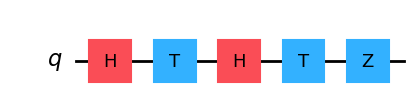

In [112]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw('mpl')

As operações são aplicadas sequencialmente, começando à esquerda e terminando à direita na figura. Vamos primeiro inicializar um vetor de estado quântico inicial e depois evoluir esse estado de acordo com a sequência de operações.

In [113]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("latex")

<IPython.core.display.Latex object>

Por fim, vamos simular o resultado de executar este experimento, aplicando a sequência de operações representada pelo circuito e fazer a medição 4000 vezes.

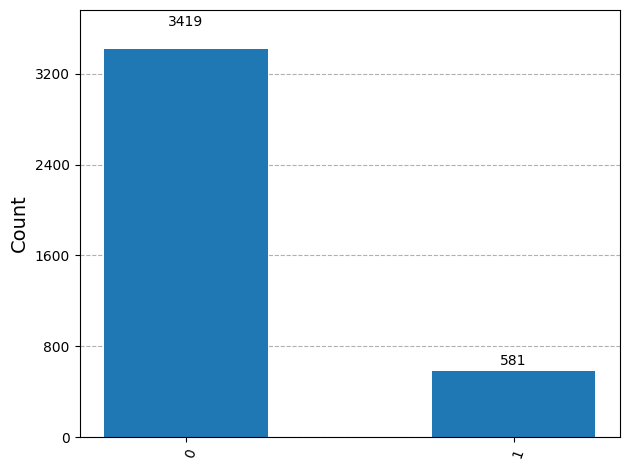

In [114]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 7:</strong> Considere a porta H respresentada no código abaixo. Desenvolva o código para executar este experimento, aplicando a sequência de operações representada pelo circuito e fazer uma medição de 5000 vezes. Interprete o resultado.

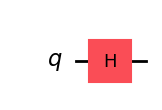

In [118]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

# Criar um estado inicial |0⟩
state = Statevector([1, 0])

# Criar um circuito quântico com a porta Hadamard
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.draw('mpl')

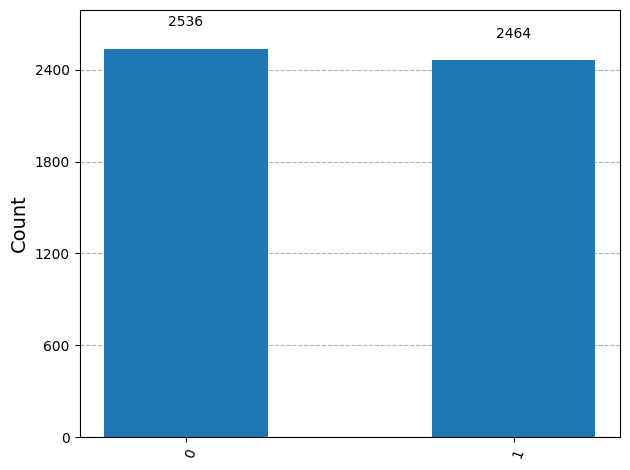

In [124]:
# coloque aqui seu código


final_state = state.evolve(circuit)


counts = final_state.sample_counts(shots=5000)

plot_histogram(counts)


**Insira sua explicação aqui**

Após a aplicação da porta H, o resultado foi 0 e 1 com a mesma probabilidade, ou seja, 50% para cada um. Isso mostra que a porta H é uma porta de Hadamard que transforma o estado |0⟩ em uma superposição igual de |0⟩ e |1⟩. Portanto, a medição do qubit após a aplicação da porta H resulta em 0 ou 1 com igual probabilidade.